#Fourier Analysis#

A great benefit of being able to call rebound from within python is the ability to directly use sophisticated analysis tools from scipy and other python libraries.  Here we will 

In [1]:
import rebound
rebound.add("Sun")
rebound.add("Jupiter")
rebound.add("Saturn")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).


By default, rebound sets G=1, which corresponds to units of $M_\odot$, AU, and where one year = $2\pi$.  Let's set the integrator to whfast, and the timestep for the integration to about 2$\%$ of Jupiter's orbital period.

In [2]:
import numpy as np
rebound.G = 4*np.pi**2
rebound.integrator = "whfast"
rebound.dt = 0.2

Now let's run the integration, storing time series for the two planets' eccentricities (for plotting) and x-positions (for the Fourier transform).  Having some idea of what the secular timescales are in the Solar System, we'll run the integration for $2\times 10^5$ yrs.

In [3]:
Nout = 1000
tmax = 2.e5
x = np.zeros((2,Nout))
y = np.zeros((2,Nout))
e = np.zeros((2,Nout))
times = np.linspace(0.,tmax,Nout)
ps = rebound.particles

for i,time in enumerate(times):
    rebound.integrate(time)
    x[0][i] = ps[1].x # we use the 0 index for x for Jup and 1 for Sat, but the indices for ps start with the Sun at 0
    y[0][i] = ps[1].y
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    os = rebound.calculate_orbits()
    e[0][i] = os[0].e
    e[1][i] = os[1].e

Let's see what the eccentricity evolution looks like with matplotlib:

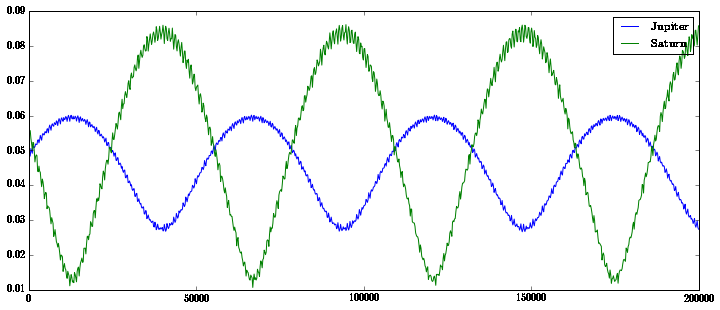

In [4]:
%matplotlib inline
labels = ["Jupiter", "Saturn"]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,e[0],label=labels[0])
plt.plot(times, e[1],label=labels[1])
plt.legend()

Now let's try to analyze these periodicities.  We don't have a long time series, so rather than a traditional Fourier transform, let's do a Lomb-Scargle periodogram.  With scipy, it's a breeze!  In addition to passing the function the times and x positions, we'll have to also provide it an array of angular frequencies, so let's begin my making a helper function to convert back and forth from periods to angular frequencies and vice-versa,

In [15]:
from scipy import signal
Npts = 10000
logPmin = np.log10(500.)
logPmax = np.log10(tmax)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps])

pgram = signal.lombscargle(times,x[0],ws)

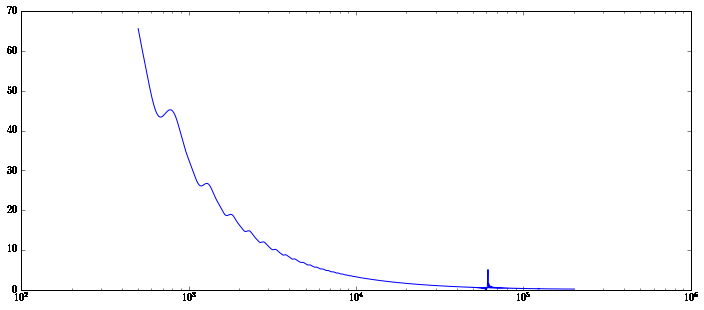

In [16]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.semilogx(Ps,np.sqrt(4*pgram/Nout))

In [11]:
print(Ps)

[    500.             503.0077414      506.03357581     509.07761208
     512.13995969     515.22072881     518.32003024     521.43797546
     524.57467663     527.73024657     530.90479879     534.09844747
     537.31130749     540.54349441     543.7951245      547.06631472
     550.35718272     553.66784688     556.99842629     560.34904074
     563.71981075     567.11085757     570.52230318     573.95427027
     577.40688231     580.88026347     584.3745387      587.88983369
     591.42627486     594.98398944     598.56310539     602.16375146
     605.78605714     609.43015274     613.09616934     616.7842388
     620.49449377     624.22706772     627.98209491     631.75971039
     635.56005006     639.38325061     643.22944955     647.09878523
     650.99139684     654.90742439     658.84700873     662.81029157
     666.79741548     670.80852386     674.84376099     678.90327202
     682.98720297     687.09570074     691.2289131      695.38698874
     699.5700772      703.77832896 

In [14]:
print(pgram)

[  1.29753392e+01   1.21113894e+01   1.18468150e+01 ...,   1.07063344e+06
   1.07255078e+06   1.07447154e+06]


In [ ]:
print(np.logspace(np.log10(1.),np.log10(10.),10))

In [6]:
print(PtoW(2*np.pi))

NameError: name 'PtoW' is not defined